In [39]:
import torch
import torch.nn as nn
from typing import List

In [40]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('device_check:',device) # GPU 사용이 가능하면 cuda 출력 / 불가능하면 cpu 출력

device_check: cuda


# ※ Section I. PyTorch 이용하여 MLP 구현하기

## One-Layer Perceptron 예제
### PyTorch에서는 torch.nn.Linear를 이용하여 간단하게 perceptron을 구현할 수 있다.
### torch.nn.Linear의 paramters
* in_features: input data (2차원 행렬)에서 column의 개수
* out_features: output data (2차원 행렬)에서 column의 개수

### torch.nn.Linear의 input
* input은 [batch_size, row, column] 사이즈를 가진 행렬 형태여야 한다. (row X column 행렬)
* batch_size란 row X column 행렬이 독립적으로 몇 개 존재하는지 정도로 이해하도록 한다.
* batch_size에 대해 더 궁금한 점은 검색해서 찾아보기

### GPU 사용
* model = model.to(device) 로 선언한 후
* model의 input data 역시 input_data = input_data.to(device)로 선언해주어야 한다.

In [41]:
# nn.Linear 예제

one_layer = nn.Linear(3,8).to(device) # nn.Linear(in_features, out_features), 입력 텐서의 크기가 3이고, 출력 텐서의 크기가 8인 선형 변환을 수행하는 nn.Linear 모듈 생성
input_data = torch.randn(5,12,3).to(device) # 12 X 3 행렬이 독립적으로 5개 있음을 의미함
out = one_layer(input_data)
print(f'output 사이즈: {out.size()}') # [5, 12, 8]

output 사이즈: torch.Size([5, 12, 8])


## Two-Layer Perceptron 예제
### nn.Sequential은 두 개의 레이어가 순차적으로 실행되게 하는 함수이다.
* 아래 예제에서 input_data는 처음 perceptron nn.Linear(3,8)을 통과한 후 [5,12,8]의 사이즈를 가지게 된다.
* 바로 다음 두번째 perceptron nn.Linear(8,16)을 통과한 후에는 [5,12,16]의 사이즈를 가지게 된다.

In [42]:
# nn.Sequential 예제

two_layer = nn.Sequential(nn.Linear(3,8),
                          nn.Linear(8,16)).to(device)
input_data = torch.randn(5,12,3).to(device) # 12 X 3 행렬이 독립적으로 5개 있음을 의미함
out = two_layer(input_data)
print(f'output 사이즈: {out.size()}') # [5, 12, 16]

output 사이즈: torch.Size([5, 12, 16])


## Activation Function
### activation function은 neural network의 layer를 통과한 후 output data 변형을 주는 함수이다.
* 일반적으로 neural network의 layer는 linear이기 때문에 activation function로는 non-linear 함수를 많이 사용한다.
* 이를 통해 neural network가 단일 linear function으로 귀결되는 것을 방지하고, 결과적으로 성능향상을 이끌 수 있다.

### 대표적인 activation function (nn 모듈을 이용하여 사용가능)
* Sigmoid (시그모이드)
* ReLU (렐루)
* tanh (하이퍼볼릭 탄제트)
* 각 함수의 수식은 각자 검색하기

In [43]:
# activation function 예제
sigmoid = nn.Sigmoid()
relu = nn.ReLU()
tanh = nn.Tanh()

torch.random.manual_seed(100) # 랜덤시드 고정
input_data = torch.randn(1,5,3)

print('인풋데이터 확인')
print(input_data)

sigmoid_output = sigmoid(input_data)
relu_output = relu(input_data)
tanh_output = tanh(input_data)

print('시그모이드 아웃풋')
print(sigmoid_output)

print('렐루 아웃풋')
print(relu_output)

print('하이퍼볼릭 탄젠트 아웃풋')
print(tanh_output)

인풋데이터 확인
tensor([[[ 0.3607, -0.2859, -0.3938],
         [ 0.2429, -1.3833, -2.3134],
         [-0.3172, -0.8660,  1.7482],
         [-0.2759, -0.9755,  0.4790],
         [-2.3652, -0.8047,  0.6587]]])
시그모이드 아웃풋
tensor([[[0.5892, 0.4290, 0.4028],
         [0.5604, 0.2005, 0.0900],
         [0.4214, 0.2961, 0.8517],
         [0.4315, 0.2738, 0.6175],
         [0.0859, 0.3090, 0.6590]]])
렐루 아웃풋
tensor([[[0.3607, 0.0000, 0.0000],
         [0.2429, 0.0000, 0.0000],
         [0.0000, 0.0000, 1.7482],
         [0.0000, 0.0000, 0.4790],
         [0.0000, 0.0000, 0.6587]]])
하이퍼볼릭 탄젠트 아웃풋
tensor([[[ 0.3458, -0.2784, -0.3746],
         [ 0.2383, -0.8817, -0.9806],
         [-0.3070, -0.6994,  0.9412],
         [-0.2691, -0.7511,  0.4454],
         [-0.9825, -0.6666,  0.5775]]])


In [44]:
# nn.Linear + nn.Sequential + activation function 종합 예제
my_model = nn.Sequential(nn.Linear(3,8),
                         nn.Sigmoid(),
                         nn.Linear(8,16),
                         nn.ReLU()).to(device)
input_data = torch.randn(5,12,3).to(device)
out = my_model(input_data)
print(f'output 사이즈: {out.size()}') # [5, 12, 16]

output 사이즈: torch.Size([5, 12, 16])


## ★ 문제1
### nn.Linear와 nn.Sequential을 사용하여 Five-Layer Perceptron을 구현하시오.
#### 조건
* input data 행렬의 row는 12, column은 3이다.
* output 행렬의 column은 7이다.
* 각 중간 layer의 out_features는 다음 순서를 따른다: [12,14,15,10,7]
* activation function은 추가하지 않는다.
* five_layer 모델은 GPU에서 실행되게 선언해야 한다.

In [45]:
five_layer = None
######################## TODO ########################
five_layer = nn.Sequential(nn.Linear(3,12),
                            nn.Linear(12,14),
                            nn.Linear(14,15),
                            nn.Linear(15,10),
                            nn.Linear(10,7)).to(device)

######################################################
input_data = torch.randn(5,12,3).to(device)
out = five_layer(input_data)
print(f'output 사이즈: {out.size()}') # [5, 12, 7]이 출력되어야 한다.

output 사이즈: torch.Size([5, 12, 7])


##  ★ 문제2
### nn.Linear, nn.Sequential, activation function을 사용하여 Ten-Layer Perceptron을 구현하시오.

#### 조건
* activation은 Sigmoid, ReLU, tanh 중 하나를 사용한다.
* input data 행렬의 row는 12, column은 3이다.
* output 행렬의 column은 아래 조건을 참고하여 알맞게 나오도록 한다.
* 각 중간 layer의 out_features는 초항이 5, 공차가 2인 등차수열을 따른다. (즉, [5,7,9,...])
* ten_layer 모델은 GPU에서 실행되게 선언해야 한다.

In [46]:
ten_layer = None
######################## TODO ########################
ten_layer = nn.Sequential(nn.Linear(3,5), nn.ReLU(), nn.Linear(5,7), nn.ReLU(), nn.Linear(7,9), nn.ReLU(), nn.Linear(9,11), nn.ReLU(),
                          nn.Linear(11,13), nn.ReLU(), nn.Linear(13,15), nn.ReLU(), nn.Linear(15,17), nn.ReLU(), nn.Linear(17,19), nn.ReLU(),
                          nn.Linear(19,21), nn.ReLU(), nn.Linear(21,23), nn.ReLU()).to(device)
######################################################
input_data = torch.randn(5,12,3).to(device)
out = ten_layer(input_data)
print(f'output 사이즈: {out.size()}') # 위 조건에 알맞은 사이즈가 출력되어야 한다.

output 사이즈: torch.Size([5, 12, 23])


## nn.Module 클래스 사용
### PyTorch의 장점은 nn.Moudule 클래스를 상속 받아서 사용자가 원하는 neural network를 구성할 수 있다는 점이다.

### class 함수 설명
* \_\_init\_\_: 클래스의 인스턴스를 생성할 때 가장 먼저 수행되는 부분. neural network에서 사용할 layer 또는 activation function 등을 정의한다.
* forward: 실제로 neural network의 작동을 제어하는 함수. input data를 받은 후 neural network의 각 layer별 실행 순서를 정하고, 최종 output을 return한다.

In [47]:
# nn.Module 클래스 예시

class MyMLP(nn.Module):

  def __init__(self):
    super(MyMLP, self).__init__()
    layers = [nn.Linear(3,8),
              nn.Sigmoid(),
              nn.Linear(8,20),
              nn.ReLU()]
    self.mlp = nn.Sequential(*layers) # 이러한 방식으로도 정의할 수 있다.

  def forward(self, x):
    x = self.mlp(x)
    return x

my_model = MyMLP().to(device)
input_data = torch.randn(5,12,3).to(device)
out = my_model(input_data)
print(f'output 사이즈: {out.size()}')

output 사이즈: torch.Size([5, 12, 20])


## ★ 문제3
### 아래 조건에 맞게 nn.Module을 상속받는 클래스를 정의하시오.

#### 조건
* MLP (Multi-Layer Perceptron)의 layer는 nn.Linear만 사용한다.
* \_\_init\_\_ 함수의 parameter 중 num_layers는 MLP의 layer의 개수를 의미한다.
* \_\_init\_\_ 함수의 parameter 중 out_feat_list는 순서대로 MLP의 layer들의 out_features를 원소로 가지고 있다. out_feat_list의 길이는 num_layers와 항상 동일해야만 한다. (assert문 참고)
* \_\_init\_\_ 함수의 parameter 중 act는 activation function을 의미한다. MLP의 모든 layer 뒤에는 항상 해당 activation function이 위치해야 한다. 문자열(string)으로 입력되며 'sigmoid', 'relu', 'tanh'만  입력되도록 한다. (assert문 참고)
* input_data 행렬의 column은 1024로 가정한다. (Hint: 이는 MLP의 첫번째 nn.LInear layer의 input_features과 동일하다.)
* 입력 및 모델 구조 출력 예시를 참고한다.

In [48]:
class CustomMLP(nn.Module):
  def __init__(self, num_layers: int, out_feat_list: List[int], act: str):
    assert len(out_feat_list)==num_layers, 'out_feat_list size should be equal to num_layers'
    super(CustomMLP, self).__init__()
    activation = self.select_act(act)
    layers = list()
    ######################## TODO ########################
    # (linear transformation + activation function / 총 두 개) * num_layers 만큼 리스트에 원소 미리 추가
    for _ in range(num_layers*2):
      layers.append(0)
    # input_data 행렬의 column은 1024이므로, 첫번째 레이어는 직접 추가
    layers[0] = nn.Linear(1024, out_feat_list[0])
    layers[1] = activation
    # for 문을 통해서 반복적으로 linear transformation + activation function 순으로 추가한다.
    for i in range(1, num_layers):
      layers[2*i] = nn.Linear(out_feat_list[i-1], out_feat_list[i])
      layers[2*i+1] = activation
    ######################################################
    self.mlp = nn.Sequential(*layers)

  def forward(self, x):
    x = self.mlp(x)
    return x

  def select_act(self, act: str):
    assert act in ['sigmoid', 'relu', 'tanh', 'leakyrelu'], 'activation should be in [sigmoid, relu, tanh]'
    if act == 'sigmoid':
      return nn.Sigmoid()
    elif act == 'relu':
      return nn.ReLU()
    elif act == 'leakyrelu': # add new activation function 'leaky relu'
      return nn.LeakyReLU()
    else:
      return nn.Tanh()

model = CustomMLP(num_layers=8, out_feat_list=[6,8,3,4,9,10,2,4], act='sigmoid')
print(model)
'''
출력결과
CustomMLP(
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=6, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=6, out_features=8, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=8, out_features=3, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=3, out_features=4, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=4, out_features=9, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=9, out_features=10, bias=True)
    (11): Sigmoid()
    (12): Linear(in_features=10, out_features=2, bias=True)
    (13): Sigmoid()
    (14): Linear(in_features=2, out_features=4, bias=True)
    (15): Sigmoid()
  )
)
'''

model = CustomMLP(num_layers=12, out_feat_list=[5,8,13,6,4,9,9,2,6,3,9,10], act='relu')
print(model)
'''
출력결과
CustomMLP(
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=13, bias=True)
    (5): ReLU()
    (6): Linear(in_features=13, out_features=6, bias=True)
    (7): ReLU()
    (8): Linear(in_features=6, out_features=4, bias=True)
    (9): ReLU()
    (10): Linear(in_features=4, out_features=9, bias=True)
    (11): ReLU()
    (12): Linear(in_features=9, out_features=9, bias=True)
    (13): ReLU()
    (14): Linear(in_features=9, out_features=2, bias=True)
    (15): ReLU()
    (16): Linear(in_features=2, out_features=6, bias=True)
    (17): ReLU()
    (18): Linear(in_features=6, out_features=3, bias=True)
    (19): ReLU()
    (20): Linear(in_features=3, out_features=9, bias=True)
    (21): ReLU()
    (22): Linear(in_features=9, out_features=10, bias=True)
    (23): ReLU()
  )
)
'''

CustomMLP(
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=6, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=6, out_features=8, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=8, out_features=3, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=3, out_features=4, bias=True)
    (7): Sigmoid()
    (8): Linear(in_features=4, out_features=9, bias=True)
    (9): Sigmoid()
    (10): Linear(in_features=9, out_features=10, bias=True)
    (11): Sigmoid()
    (12): Linear(in_features=10, out_features=2, bias=True)
    (13): Sigmoid()
    (14): Linear(in_features=2, out_features=4, bias=True)
    (15): Sigmoid()
  )
)
CustomMLP(
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=5, bias=True)
    (1): ReLU()
    (2): Linear(in_features=5, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=13, bias=True)
    (5): ReLU()
    (6): Linear(in_features=13, out_features=6, bias=True)
    (7): ReLU()
  

'\n출력결과\nCustomMLP(\n  (mlp): Sequential(\n    (0): Linear(in_features=1024, out_features=5, bias=True)\n    (1): ReLU()\n    (2): Linear(in_features=5, out_features=8, bias=True)\n    (3): ReLU()\n    (4): Linear(in_features=8, out_features=13, bias=True)\n    (5): ReLU()\n    (6): Linear(in_features=13, out_features=6, bias=True)\n    (7): ReLU()\n    (8): Linear(in_features=6, out_features=4, bias=True)\n    (9): ReLU()\n    (10): Linear(in_features=4, out_features=9, bias=True)\n    (11): ReLU()\n    (12): Linear(in_features=9, out_features=9, bias=True)\n    (13): ReLU()\n    (14): Linear(in_features=9, out_features=2, bias=True)\n    (15): ReLU()\n    (16): Linear(in_features=2, out_features=6, bias=True)\n    (17): ReLU()\n    (18): Linear(in_features=6, out_features=3, bias=True)\n    (19): ReLU()\n    (20): Linear(in_features=3, out_features=9, bias=True)\n    (21): ReLU()\n    (22): Linear(in_features=9, out_features=10, bias=True)\n    (23): ReLU()\n  )\n)\n'

---
# ※ Section II. MLP를 이용한 이미지 분류 예측 모델 학습

## CIFAR10 데이터
* train: 50,000장
* test: 10,000장
* label: 10개 (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)

In [49]:
# 구글 드라이브 사용 희망 시 아래 코드 주석 해제하고 실행
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [50]:
from torchvision import datasets
from torchvision.transforms import functional as TF
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

## 데이터 저장
### 코랩 임시 저장소 또는 구글 드라이브에 데이터 저장
* 둘 중 원하는 방법 선택하여 실행
* 참고: 데이터 사이즈 약 350MB




In [51]:
# 임시 저장소에 저장 / 코랩 런타임 끊길 경우 초기화
# traindata = datasets.CIFAR10(root = './data', train = True, download = True)
# testdata = datasets.CIFAR10(root = './data', train = False, download = True)

# 구글 드라이브에 저장 / 코랩 런타임 끊기더라도 초기화 되지 않음
trainset = datasets.CIFAR10(root = '/content/drive/MyDrive/data', train = True, download = True)
testset = datasets.CIFAR10(root = '/content/drive/MyDrive/data', train = False, download = True)

Files already downloaded and verified
Files already downloaded and verified


## 데이터 상세정보 확인

In [52]:
# data 사이즈 확인
print(len(trainset), len(testset))

50000 10000


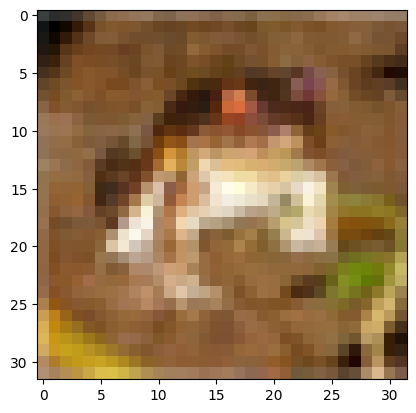

image type: <class 'PIL.Image.Image'>
label: 6


In [53]:
# Train data 이미지 및 레이블 확인
image, label = trainset[0]
plt.imshow(image)
plt.show()

print(f'image type: {type(image)}')
print(f'label: {label}')

## 입력 자료구조 변환
* PyTorch에서 neural network에 대한 모든 입력은 PyTorch에서 정의한 Tensor라는 자료구조를 사용해야 함
* 위 셀에서 image type은 <class 'PIL.Image.Image'>이므로 변형 필요
* TF.to_tensor 함수 사용

In [54]:
# PIL.Image.Image -> torch.Tensor로 변경
image = TF.to_tensor(image)
print(f'image type: {type(image)}')
print(f'image size: {image.size()}') # 3채널(R,G,B), 32(height,세로), 32(width,가로)

image type: <class 'torch.Tensor'>
image size: torch.Size([3, 32, 32])


## pre-processing
* 이미지 데이터에 Multi-Layer Perceptron (MLP) 적용하기 위한 pre-processing
* (review) nn.Linear의 인풋 데이터는 2차원 행렬 형태를 가져야 한다.
* 하지만 CIFAR10과 같은 이미지 데이터의 경우 height, width 외에 channel이라는 차원을 가지고 있다. (즉 3차원 데이터)
* 따라서 이러한 형태를 2차원 형태로 변환해주는 flattening 과정이 필요하다. (flatten 메소드 사용)

In [55]:
# flatten, permute
image, label = trainset[1214] # train data 1개 load
image = TF.to_tensor(image)
print(f'image size 확인: {image.size()}')
image_flat = image.flatten(start_dim=1, end_dim=2) # start_dim과 end_dim는 flatten를 수행할 때 시작 차원과 끝 차원을 지정. 여기서 start_dim=1, end_dim=2는 두 번째 차원부터 세 번째 차원까지 평탄화됨을 나타냄.
print(f'flattened image size 확인: {image_flat.size()}')

image size 확인: torch.Size([3, 32, 32])
flattened image size 확인: torch.Size([3, 1024])


* Dataset 클래스를 새롭게 정의하여 CIFAR10 데이터셋에서 이미지를 불러올 때마다 flatten과 permute를 자동으로 수행하게 한다. 아래와 같이 선언 (코드 수정할 필요 없음)

In [56]:
class Cifar10Dataset(Dataset):
  def __init__(self, dataset, train=True):
    super(Cifar10Dataset, self).__init__()
    self.dataset = dataset
    self.train = train

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, index):
    image, label = self.dataset[index]
    image = TF.to_tensor(image)
    image = image.flatten(start_dim=1, end_dim=2)
    # image = image.permute(1,0)
    return image, label

train_data = Cifar10Dataset(trainset, train=True)
test_data = Cifar10Dataset(testset, train=False)

image, label = train_data[1234]
print(f'image size 확인: {image.size()}')

image size 확인: torch.Size([3, 1024])


## DataLoader

* 위처럼 정의된 Dataset에서 데이터를 한 번에 batch_size만큼 불러올 수 있는 기능
* 아래와 같이 선언 (코드 수정할 필요 없음)

In [57]:
# DataLoader 사용
train_loader = DataLoader(train_data, batch_size=128, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False, pin_memory=True)

image, label = next(iter(train_loader)) #  첫 번째 미니배치를 가져옴
print(f'image size 확인: {image.size()}') # [128, 3, 1024] == [batch_size, channel(RGB), height*width]
print(f'label size 확인: {label.size()}') # [128] == [batch_size]

image size 확인: torch.Size([128, 3, 1024])
label size 확인: torch.Size([128])


## 모델 학습을 위한 model, optimizer, loss function 정의
* 학습 후 테스트 진행


In [58]:
# model, optimizer, loss function 정의 예시
torch.random.manual_seed(100)
model = CustomMLP(num_layers=5, out_feat_list=[1024,256,64,16,10], act='relu').to(device) # 문제3에서 생성한 CustomMLP 사용
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer. lr: learning rate
                                                           # model.parameters()는 모델의 학습 가능한 모든 매개변수들을 전달하는 역할
                                                           # learning rate는 가중치 업데이트 단계에서 사용
criterion = nn.CrossEntropyLoss() # loss function
                                  # 크로스 엔트로피 손실 함수: 다중 클래스 분류(multi-class classification) 문제에 사용

In [59]:
# model training 예시 코드
from tqdm import tqdm
for epoch in range(20):
  total_loss = 0.0
  total_right = 0
  for i, (image, label) in enumerate(tqdm(train_loader)):
    image = image.to(device)
    label = label.to(device)

    # 모델 label 분류 예측
    output = model(image)
    output = output.max(1)[0]

    # loss 계산
    loss = criterion(output, label.long())
    total_loss += loss

    # 정답을 맞춘 개수 계산
    right = (output.max(1)[1] == label).sum()
    total_right += right

    # Back-Propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i==len(train_loader)-1:
      print(f'{epoch+1} average loss: {total_loss/len(train_loader):.6f}')
      print(f'{epoch+1} average accuracy: {total_right/len(train_loader.dataset)*100:.2f}%')

100%|██████████| 391/391 [00:08<00:00, 44.36it/s]


1 average loss: 2.154045
1 average accuracy: 20.96%


100%|██████████| 391/391 [00:09<00:00, 40.16it/s]


2 average loss: 2.047038
2 average accuracy: 27.54%


100%|██████████| 391/391 [00:08<00:00, 47.21it/s]


3 average loss: 1.986289
3 average accuracy: 29.93%


100%|██████████| 391/391 [00:09<00:00, 42.43it/s]


4 average loss: 1.927736
4 average accuracy: 32.21%


100%|██████████| 391/391 [00:09<00:00, 40.25it/s]


5 average loss: 1.891010
5 average accuracy: 33.56%


100%|██████████| 391/391 [00:08<00:00, 48.67it/s]


6 average loss: 1.856721
6 average accuracy: 34.79%


100%|██████████| 391/391 [00:09<00:00, 41.55it/s]


7 average loss: 1.826869
7 average accuracy: 35.84%


100%|██████████| 391/391 [00:09<00:00, 42.32it/s]


8 average loss: 1.799609
8 average accuracy: 36.97%


100%|██████████| 391/391 [00:08<00:00, 46.24it/s]


9 average loss: 1.777067
9 average accuracy: 37.54%


100%|██████████| 391/391 [00:09<00:00, 41.44it/s]


10 average loss: 1.752938
10 average accuracy: 38.54%


100%|██████████| 391/391 [00:08<00:00, 47.30it/s]


11 average loss: 1.731115
11 average accuracy: 39.52%


100%|██████████| 391/391 [00:09<00:00, 42.39it/s]


12 average loss: 1.709890
12 average accuracy: 40.32%


100%|██████████| 391/391 [00:09<00:00, 41.83it/s]


13 average loss: 1.690273
13 average accuracy: 41.09%


100%|██████████| 391/391 [00:08<00:00, 47.94it/s]


14 average loss: 1.670232
14 average accuracy: 41.82%


100%|██████████| 391/391 [00:09<00:00, 41.59it/s]


15 average loss: 1.654112
15 average accuracy: 42.25%


100%|██████████| 391/391 [00:08<00:00, 45.16it/s]


16 average loss: 1.637611
16 average accuracy: 43.10%


100%|██████████| 391/391 [00:08<00:00, 44.15it/s]


17 average loss: 1.616711
17 average accuracy: 43.87%


100%|██████████| 391/391 [00:09<00:00, 41.39it/s]


18 average loss: 1.605795
18 average accuracy: 44.18%


100%|██████████| 391/391 [00:08<00:00, 48.86it/s]


19 average loss: 1.588607
19 average accuracy: 44.77%


100%|██████████| 391/391 [00:09<00:00, 41.54it/s]

20 average loss: 1.577259
20 average accuracy: 45.28%


In [60]:
# test 예시 코드
total_right = 0
for i, (image, label) in enumerate(tqdm(test_loader)):
  image = image.to(device)
  label = label.to(device)

  # 모델 label 분류 예측
  output = model(image)
  output = output.max(1)[0]

  # 정답을 맞춘 개수 계산
  right = (output.max(1)[1] == label).sum()
  total_right += right

  if i==len(test_loader)-1:
    print(f'TEST average accuracy: {total_right/len(test_loader.dataset)*100:.2f}%')

100%|██████████| 79/79 [00:01<00:00, 52.35it/s]

TEST average accuracy: 38.90%


## ★ 문제4
### 아래 조건에 맞게 코드를 작성하고 test 정확도 40% 이상 달성을 목표로 모델을 구현하시오.

### 조건
* model은 반드시 문제3에서 생성한 CustomMLP를 사용하도록 한다.
* num_layers는 10이 넘지 않아야 한다.
* out_feat_list에는 1024를 넘는 수가 없어야 한다.
* activation function은 Sigmoid, ReLU, tanh 외에 소개되지 않은 것을 사용해도 상관 없다. 소개되지 않은 activation function을 사용할 경우 select_act 함수를 적절히 수정하도록 한다.
* 아래 코드에서 수정해도 되는 것: CustomMLP의 모든 파라미터(단 위 조건에 맞아야 함), SEED, LEARNING_RATE, optimizer
* 아래 코드에서 수정하면 안 되는 것: criterion, TRAINING PHASE, TEST PHASE
* 성능평가: 테스트 정확도 40% 이상이면 만점, 40% 미만은 1% 구간 별로 1점씩 감점
(예: 39.5% -> 1점 감점 38.7% -> 2점 감점)

In [65]:
####################################### TODO #######################################
SEED = 50 # can be changed
LEARNING_RATE = 0.0009 # can be changed
torch.random.manual_seed(SEED)
model = CustomMLP(num_layers=8, out_feat_list=[1024,256,64,16,10, 128, 256, 512], act='leakyrelu').to(device) # can be changed (but meet conditions above)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # can be changed

####################################################################################
criterion = nn.CrossEntropyLoss() # NEVER CHANGE!!

#################################### TRAINING PHASE // NEVER EDIT!! ####################################
from tqdm import tqdm
for epoch in range(20):
  total_loss = 0.0
  total_right = 0
  for i, (image, label) in enumerate(tqdm(train_loader)): # 각 에포크는 train_loader에서 미니배치를 가져와서 학습
    image = image.to(device)
    label = label.to(device)

    # 모델 label 분류 예측
    output = model(image)
    output = output.max(1)[0]

    # loss 계산
    loss = criterion(output, label.long())
    total_loss += loss

    # 정답을 맞춘 개수 계산
    right = (output.max(1)[1] == label).sum()
    total_right += right

    # Back-Propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i==len(train_loader)-1:
      print(f'{epoch+1} average loss: {total_loss/len(train_loader):.6f}')
      print(f'{epoch+1} average accuracy: {total_right/len(train_loader.dataset)*100:.2f}%')
#######################################################################################################

###################################### TEST PHASE // NEVER EDIT!! #####################################
total_right = 0
for i, (image, label) in enumerate(tqdm(test_loader)):
  image = image.to(device)
  label = label.to(device)

  # 모델 label 분류 예측
  output = model(image)
  output = output.max(1)[0]

  # 정답을 맞춘 개수 계산
  right = (output.max(1)[1] == label).sum()
  total_right += right

print()
print()
print(f'TEST average accuracy: {total_right/len(test_loader.dataset)*100:.2f}%')
#######################################################################################################

100%|██████████| 391/391 [00:09<00:00, 40.47it/s]


1 average loss: 2.387727
1 average accuracy: 13.64%


100%|██████████| 391/391 [00:09<00:00, 40.65it/s]


2 average loss: 2.065557
2 average accuracy: 23.68%


100%|██████████| 391/391 [00:08<00:00, 45.73it/s]


3 average loss: 1.989086
3 average accuracy: 27.09%


100%|██████████| 391/391 [00:09<00:00, 40.65it/s]


4 average loss: 1.927838
4 average accuracy: 29.71%


100%|██████████| 391/391 [00:09<00:00, 42.50it/s]


5 average loss: 1.875292
5 average accuracy: 32.00%


100%|██████████| 391/391 [00:08<00:00, 43.50it/s]


6 average loss: 1.837768
6 average accuracy: 33.36%


100%|██████████| 391/391 [00:12<00:00, 31.28it/s]


7 average loss: 1.800957
7 average accuracy: 35.00%


100%|██████████| 391/391 [00:08<00:00, 45.63it/s]


8 average loss: 1.769212
8 average accuracy: 36.21%


100%|██████████| 391/391 [00:09<00:00, 40.49it/s]


9 average loss: 1.739326
9 average accuracy: 37.32%


100%|██████████| 391/391 [00:09<00:00, 40.91it/s]


10 average loss: 1.711000
10 average accuracy: 38.54%


100%|██████████| 391/391 [00:08<00:00, 44.69it/s]


11 average loss: 1.685491
11 average accuracy: 39.38%


100%|██████████| 391/391 [00:09<00:00, 39.34it/s]


12 average loss: 1.660815
12 average accuracy: 40.38%


100%|██████████| 391/391 [00:09<00:00, 40.86it/s]


13 average loss: 1.636583
13 average accuracy: 41.40%


100%|██████████| 391/391 [00:08<00:00, 43.74it/s]


14 average loss: 1.607401
14 average accuracy: 42.48%


100%|██████████| 391/391 [00:09<00:00, 39.75it/s]


15 average loss: 1.587101
15 average accuracy: 43.28%


100%|██████████| 391/391 [00:09<00:00, 42.64it/s]


16 average loss: 1.561242
16 average accuracy: 44.27%


100%|██████████| 391/391 [00:09<00:00, 42.92it/s]


17 average loss: 1.537474
17 average accuracy: 45.27%


100%|██████████| 391/391 [00:10<00:00, 38.53it/s]


18 average loss: 1.514397
18 average accuracy: 46.13%


100%|██████████| 391/391 [00:08<00:00, 43.59it/s]


19 average loss: 1.491398
19 average accuracy: 46.98%


100%|██████████| 391/391 [00:09<00:00, 42.08it/s]


20 average loss: 1.467324
20 average accuracy: 47.91%


100%|██████████| 79/79 [00:01<00:00, 53.70it/s]



TEST average accuracy: 43.15%
